# Analysis and Insights of 2019 NYC Airbnb data

## Project Objectives.
- Clean up the dataset for proper use with analysis and ML
- Conduct AB Testing to test statistical significance of the avg prices of listings in Manhattan vs Brooklyn based on a hypothesis related to NYC COL
- Create classification model that predict the room type for a listing.


In [2]:
# for mandatory data cleaning and manipulation where necessary
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

# for probability distributions and performing statistical analysis
import scipy.stats as stats

# for estimating statistical models
import statsmodels.stats.api as sms

# for creating a decision tree model for classifying how popular each host is
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# creating training and testing data & for tuning hyper parameters for best f1 score in model
from sklearn.model_selection import train_test_split, GridSearchCV

# handling the small NLP within the dataframe
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# for accessing metrics to define performance of model(s)
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# for saving our ML model
import pickle

# rounding values where an appropriate whole value is needed at all times
from math import ceil

### Before anything, we will load in the original dataset and create a copy that will be cleaned and stored later

In [3]:
# load in dataset
original_df = pd.read_csv('data/AB_NYC_2019.csv')


# create copy that will be manipulated
df = original_df.copy()


# quick look and insight into df
print(df.shape)
df.head(20)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Description of attributes
- id: A unique identifier for each Airbnb listing.
- name: The name or title given to the Airbnb listing by the host.
- host_id: A unique identifier for the host or owner of the Airbnb listing.
- host_name: The name of the host or owner of the Airbnb listing.
- neighbourhood_group: The broader neighborhood or borough where the listing is located (e.g., Brooklyn, Manhattan).
- neighbourhood: The specific neighborhood within the borough where the listing is located (e.g., Kensington, Midtown, Harlem).
- latitude: The latitude coordinate of the listing's location.
- longitude: The longitude coordinate of the listing's location.
- room_type: The type of accommodation offered, such as an entire home/apartment or a private room.
- price: The nightly price (in US dollars) for the listing.
- minimum_nights: The minimum number of nights required for a booking at this listing.
- number_of_reviews: The total number of reviews the listing has received from guests.
- last_review: The date of the most recent review left for the listing.
- reviews_per_month: The average number of reviews the listing receives per month.
- calculated_host_listings_count: The number of listings the host has on Airbnb, - calculated by the platform.
- availability_365: The number of days the listing is available for booking in the next 365 days.

In [4]:
# check what columns I really need
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# check for null values as well
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Based on info from the columns, there doesn't appear to be data that needs to be replaced with any form of mean, median, or mode data. 
### Also the last review and reviews per month columns have a justifiable reason to be null 
- Probably will replace with certain default values like the earliest date possible and also 0 reviews.
- This will still isolate them as the earliest date values and the 0s will be the most extreme outliers aka null values

In [7]:
df[df.name.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0


In [8]:
# fixing the name column first
df.name.fillna('Unknown',inplace=True)
df[df.name.str.contains('Unknown')].shape

(16, 16)

In [9]:
# fix the null host names
df['host_name'].fillna('Not available', inplace=True)
df[df.host_name.str.contains('Not available')].shape

(21, 16)

In [10]:
# the last review columns are a bunch of dates but something that will matter is to check if its stored as datetime object which is what we want
df['last_review'].apply(type)

0          <class 'str'>
1          <class 'str'>
2        <class 'float'>
3          <class 'str'>
4          <class 'str'>
              ...       
48890    <class 'float'>
48891    <class 'float'>
48892    <class 'float'>
48893    <class 'float'>
48894    <class 'float'>
Name: last_review, Length: 48895, dtype: object

In [11]:
# give the null last review dates a date value not too far off from all other values.
# This will be helpful for identifying trends and also knowing what values are clearly outliers in visualizations or sneak peeks of the data
df['last_review'].fillna('1950-01-01', inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# the date is stored as a string with null values being stored as float values
df['last_review'] = pd.to_datetime(df['last_review'])
print(df['last_review'][:3].apply(type))
df.head()


0    <class 'pandas._libs.tslibs.timestamps.Timesta...
1    <class 'pandas._libs.tslibs.timestamps.Timesta...
2    <class 'pandas._libs.tslibs.timestamps.Timesta...
Name: last_review, dtype: object


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# fix the reviews per month column
df.reviews_per_month.fillna(0, inplace=True)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
# ensure no nulls remain
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# quick check of dataframe to ensure types are in line with any changes made
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [16]:
# quick look at our current df
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
# save the cleaned dataset to a new file and preserve dtypes
df.to_csv('data/cleaned_airbnb_data.csv', index=False)


# load the saved df to ensure data stays the same
df_clean = pd.read_csv('data/cleaned_airbnb_data.csv')
df_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
# ensure the dataset is clean
print(df_clean.shape)
print(df_clean.isnull().sum())
del df_clean

(48895, 16)
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### Now that the issue with null values have been cleared up. We want to do a little bit of Exploratory Data Analysis to get more insight into how the different columns look in relation to the dispersion of data points

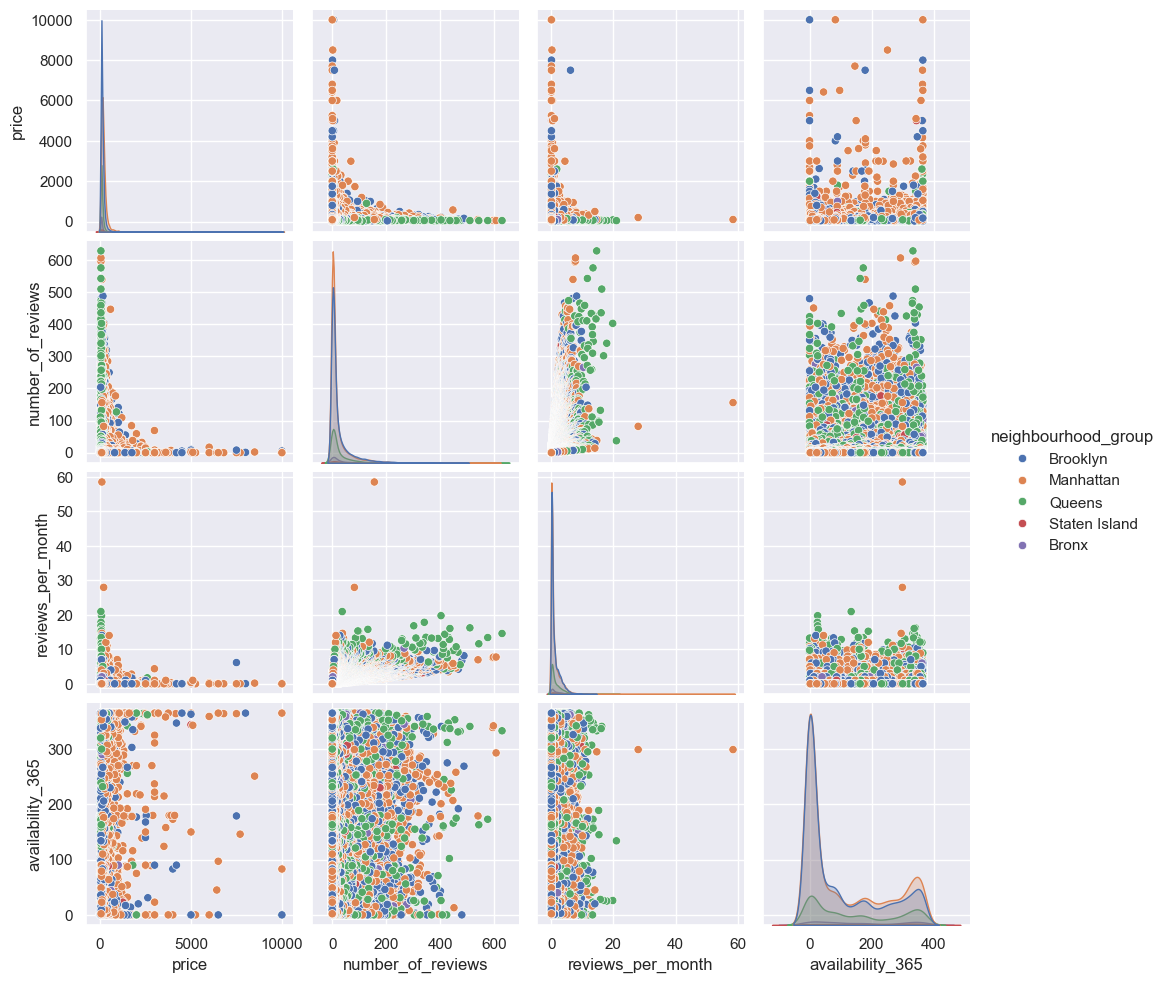

In [86]:
selected_features = df[['neighbourhood_group','price',
       'number_of_reviews',
       'reviews_per_month',
       'availability_365']]

sns.pairplot(data=selected_features, hue='neighbourhood_group')

# AB Testing pt.1 
## analyzing cleaned data to see what is feasible to test on

### Now that we have cleaned up the dataset and also been given a good view on the distribution of values between the quantitative variables and each neighborhood group, we'll move to AB testing

### We want to dive into seeing more into specific fields of the dataset in relation to
- max and minimum values
- counts
- averages
- etc...

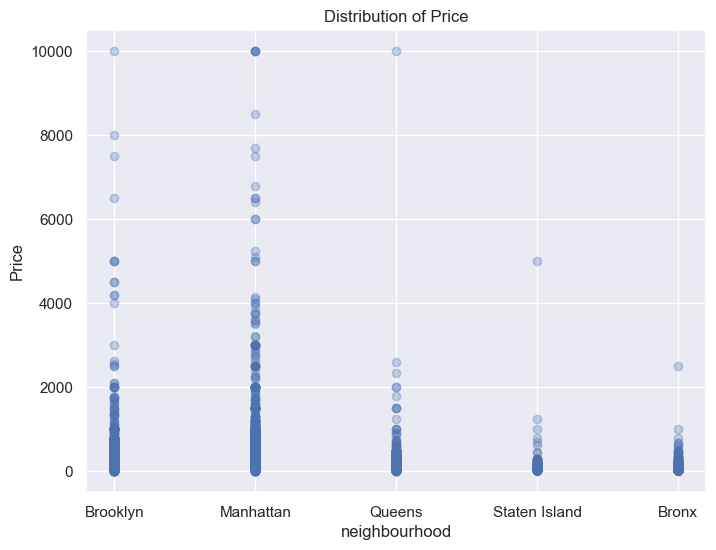

In [87]:
def plot_column(df, column_name, alpha=0.8):
    """
    Creates a line plot for the given column against the 'id' column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column_name (str): The name of the column to be plotted.
        alpha (float, optional): The transparency value for the line plot. Default is 0.8.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(df['neighbourhood_group'], df[column_name], alpha=alpha)
    ax.set_xlabel('neighbourhood')
    ax.set_ylabel(column_name.capitalize().replace('_', ' '))
    ax.set_title(f'Distribution of {column_name.replace("_", " ").capitalize()}')
    plt.show()

# to go even deeper, we'll conduct an EDA just to get an idea of the distribution of max reviews and reviews per month
focused_test = df[['neighbourhood_group', 'price']]

# Plot for 'number_of_reviews'
plot_column(focused_test, 'price', alpha=0.3)


### price seems like a well decent feature to test

## We are checking more into the prices that are available within the dataset
- Particularly just need to see a statistical summary of listings

In [88]:
# checking more statistics on each host to determine what I perform my AB Test on
host_df = df.groupby('host_id')['price'].agg(['mean', 'min', 'max', 'count', 'std']).reset_index()
host_df.sort_values(by='mean', ascending=True)[150:160]


,host_id,mean,min,max,count,std
36456,258671946,27.000000,27,27,1,NaN
15312,17927814,27.000000,27,27,1,NaN
20879,35510045,27.000000,27,27,1,NaN
32441,161743285,27.000000,27,27,1,NaN
25222,57398859,27.000000,27,27,1,NaN
35428,232778333,27.000000,25,29,2,2.828427
28955,101970559,27.166667,0,50,6,22.613418
7454,4878363,27.500000,25,30,2,3.535534
31908,153371127,27.500000,27,28,2,0.707107
31504,145242566,27.500000,25,30,2,3.535534


In [89]:
# checking more statistics on each host to determine what I perform my AB Test on
host_df1 = df.groupby('host_id')['price'].agg(['mean', 'min', 'max', 'count', 'std']).reset_index()
host_df1.sort_values(by='mean', ascending=False)

,host_id,mean,min,max,count,std
26778,72390391,10000.0,10000,10000,1,NaN
16313,20582832,10000.0,10000,10000,1,NaN
7693,5143901,10000.0,10000,10000,1,NaN
6985,4382127,9999.0,9999,9999,1,NaN
6315,3906464,9999.0,9999,9999,1,NaN
...,...,...,...,...,...,...
33762,197169969,10.0,10,10,1,NaN
34080,205820814,10.0,10,10,1,NaN
37092,268138154,10.0,10,10,1,NaN
11495,10132166,0.0,0,0,1,NaN


In [90]:
# when we check both, we see that we need to possibly remove a few hosts
# this is because they have listings with no price.
# We may also have a limit behind it as a 10 dollar listing isnt realistic

print(df.shape)
df.drop(df[df['price'] < 1].index, inplace = True)
print(df.shape)

(48895, 16)
(48884, 16)


### Now we'll start looking into our treatment and control groups.

In [91]:
# just as a quick check, we are looking to see what are the unique neighbourhood groups in the dataset
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [92]:
# we originally want to test on brooklyn and manhattan and those are available so we now make a new dataset with those two boroughs
# now we have a good enough size for what we are looking for so we will create the testing dataframe
testing_df = df[(    #31 days is included to remove the bias from listings that are barely available
                 (df['neighbourhood_group'] == 'Manhattan') | (df['neighbourhood_group'] == 'Brooklyn'))]
testing_df.shape


(41755, 16)

In [93]:
testing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [94]:
# next we check that there is a fair enough population of listings for the Manhattan and Brooklyn
print(testing_df[testing_df['neighbourhood_group'] == 'Manhattan'].shape, \
      testing_df[testing_df['neighbourhood_group'] == 'Brooklyn'].shape)

(21660, 16) (20095, 16)


## everything seems decent so now we are going to check the avg prices for each borough that will be tested through AB testing

In [95]:
# avg price of listings for Manhattan and Brooklyn
testing_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Brooklyn     124.438915
Manhattan    196.884903
Name: price, dtype: float64

## Problem to perform actual AB test against:
### Originally, with starting the airbnb platform in NYC, we only allowed for listings to be posted within the borough of Manhattan. However, with expansion, we have now accomodated for all boroughs. Currently, Brooklyn has a similar number of listings as Manhattan within the data collected. With Brooklyn being apart of the new addition to the platform, we believe that listings will generally cost less in Brooklyn given the COL is lower in Brooklyn vs in Manhattan. 

### Hypothesis: We specifically expect the prices of listings to follow the current trend for the COL in relation to rent where the avg rent for a 700 square foot apartment in Manhattan costs roughly 34% more than the same apartment in Brooklyn. Therefore, we believe that the difference the avg cost of listings in Manhattan and Brooklyn will be statistically signifcant in terms of being different, particularly with Manhattan costing more

### Through tests performed on the data, we found the avg price of listings in the two boroughs to be as follows. 
- Brooklyn     124.438915
- Manhattan    196.884903

## The avg prices roughly follows the COL trend between Manhattan and Brooklyn. However, we want to conduct an AB test to confirm that the difference is statistically signficant as we want to ensure outliers or inconsistencies in prices aren't highly influencing the average prices.

In [96]:
# avg price of listings in all boroughs the proportions
''' Brooklyn     124.438915
Manhattan    196.884903
'''
df.price.mean()

152.75505277800508

In [97]:
# Step 1: Creating the control and treatment groups
# Filter data for Manhattan and Brooklyn(control and treatment)
df_manhattan = df[df['neighbourhood_group'] == 'Manhattan']
df_brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']

# Prices from Manhattan and Brooklyn
prices_manhattan = df_manhattan['price']
prices_brooklyn = df_brooklyn['price']

In [98]:
# Step 2: Check Data Quality
# Checking for missing values in price
missing_values = df[['price']].isnull().sum()
print("Missing values in price column:", missing_values)


Missing values in price column: price    0
dtype: int64


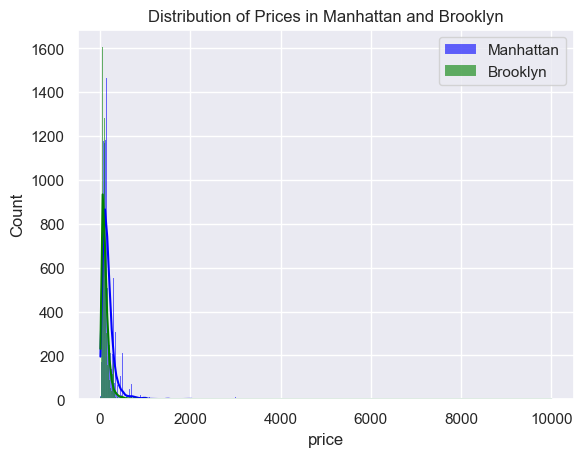

Shapiro-Wilk test p-value (Manhattan): 0.0
Shapiro-Wilk test p-value (Brooklyn): 0.0
Levene's test p-value for equal variances: 9.007067514841623e-66


c:\Users\adwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
# Step 3: Check for Normality and Equal Variance
# Visualize data distribution with histograms
sns.histplot(prices_manhattan, kde=True, label='Manhattan', color='blue', alpha=0.6)
sns.histplot(prices_brooklyn, kde=True, label='Brooklyn', color='green', alpha=0.6)
plt.legend()
plt.title('Distribution of Prices in Manhattan and Brooklyn')
plt.show()

# Check for normality with Shapiro-Wilk test
shapiro_manhattan = stats.shapiro(prices_manhattan)
shapiro_brooklyn = stats.shapiro(prices_brooklyn)
print("Shapiro-Wilk test p-value (Manhattan):", shapiro_manhattan.pvalue)
print("Shapiro-Wilk test p-value (Brooklyn):", shapiro_brooklyn.pvalue)

# Check for equal variances using Levene's test
levene_test = stats.levene(prices_manhattan, prices_brooklyn)
print("Levene's test p-value for equal variances:", levene_test.pvalue)

In [100]:
# Step 3: Adjusted
# Perform the Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(prices_manhattan, prices_brooklyn, alternative='two-sided')

print("Mann-Whitney U test statistic:", u_stat)
print("Mann-Whitney U test p-value:", p_value_mw)

# Interpret results
if p_value_mw < 0.05:
    print("Reject the null hypothesis. p-value:", p_value_mw)
    print("There is a significant difference in the distribution of prices between Manhattan and Brooklyn.")
else:
    print("Fail to reject the null hypothesis. p-value:", p_value_mw)
    print("There is no significant difference in the distribution of prices between Manhattan and Brooklyn.")

Mann-Whitney U test statistic: 299147949.5
Mann-Whitney U test p-value: 0.0
Reject the null hypothesis. p-value: 0.0
There is a significant difference in the distribution of prices between Manhattan and Brooklyn.


Cliff's Delta effect size: 0.37457855197047635


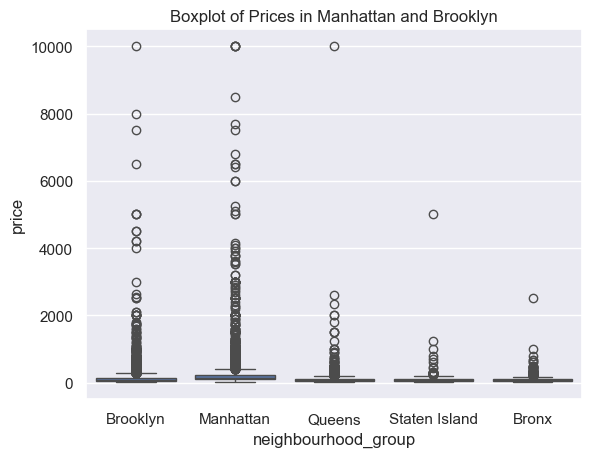

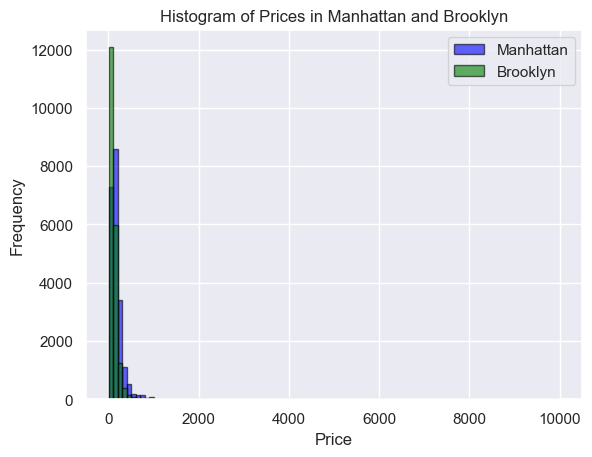

In [101]:
## Visuals supporting why there is statistical significance from a holistic view
# Additional libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare

# Define a function to calculate Cliff's Delta
def cliffs_delta(x, y):
    n_x = len(x)
    n_y = len(y)
    gt = sum(x_i > y_i for x_i in x for y_i in y)
    lt = sum(x_i < y_i for x_i in x for y_i in y)
    delta = (gt - lt) / (n_x * n_y)
    return delta

# Calculate Cliff's Delta
delta = cliffs_delta(prices_manhattan, prices_brooklyn)
print(f"Cliff's Delta effect size: {delta}")

# Visualizations

# Boxplot of prices in Manhattan and Brooklyn
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Boxplot of Prices in Manhattan and Brooklyn')
plt.show()

# Histograms of prices in Manhattan and Brooklyn
plt.hist(prices_manhattan, bins=100, alpha=0.6, label='Manhattan', color='blue', edgecolor='black')
plt.hist(prices_brooklyn, bins=100, alpha=0.6, label='Brooklyn', color='green', edgecolor='black')
plt.legend(loc='upper right')
plt.title('Histogram of Prices in Manhattan and Brooklyn')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


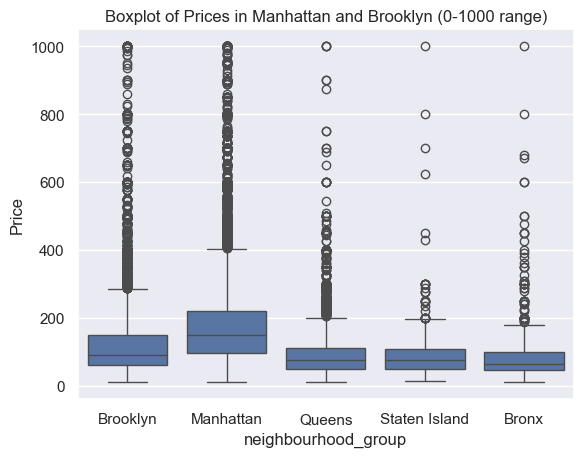

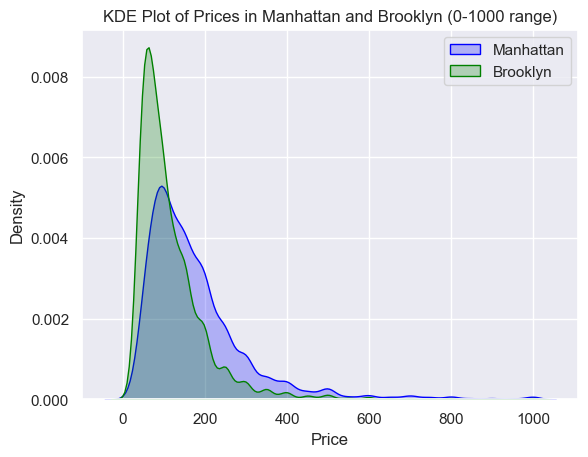

In [102]:
## Visualizations showcasing it within the price range where a majority of listings are (0-1000)
# Boxplot of prices in Manhattan and Brooklyn (limited to 0-1000 range)
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] <= 1000])
plt.title('Boxplot of Prices in Manhattan and Brooklyn (0-1000 range)')
plt.ylabel('Price')
plt.show()

# Kernel Density Plot (KDE) of prices in Manhattan and Brooklyn (limited to 0-1000 range)
sns.kdeplot(prices_manhattan[(prices_manhattan >= 0) & (prices_manhattan <= 1000)], label='Manhattan', color='blue', fill=True)
sns.kdeplot(prices_brooklyn[(prices_brooklyn >= 0) & (prices_brooklyn <= 1000)], label='Brooklyn', color='green', fill=True)
plt.title('KDE Plot of Prices in Manhattan and Brooklyn (0-1000 range)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# New version of ML to be done along with either random forest or decision tree classifier
## We will be predicting the room type for a listing

## The room type is a new feature on the platform that is currently optional, as it was previously something that had to be included in the title

## In the case and scenario that someone creates a listing but leaves out the room type of the listing, we need a ML model that can predict what the room type of the listing.
- It will be based on:
    - host_id, name, neighborhood, neighbourhood group, price, number of reviews, reviews per month, and calculated_host_listings_count

### Essentially, it would need some forms of NLP, included as well

### When model is done, we need to save it so that it can be used


### Now that we have proven that the difference between the average listing prices for Manhattan and Brooklyn is statistically signficant, we'll now move on to creating classifications for the hosts on the platform

In [103]:
# To start, we'll bring up the modified version of our original df
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1950-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [104]:
# create our X and y variables for training and testing later on
# features
features = ['neighbourhood_group','neighbourhood', 'price', 'number_of_reviews','reviews_per_month', 'availability_365']
X = df[features]

# target variable
target_variable = ['room_type']
y = df[target_variable]

In [105]:
# One-Hot Encoding for categorical variables.
# Choice of NLP used for efficiency and simplicity
categorical_features = ['neighbourhood_group','neighbourhood']
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown= 'ignore')

In [106]:
# fit and transform the categorical features into numerical values for
encoded_categorical_data = one_hot_encoder.fit_transform(X[categorical_features])

c:\Users\adwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
# Replacing original text columns with encoded columns
# drop current columns
X = X.drop(categorical_features, axis = 1)

# giving feature names to new encoded data columns
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

# creating df for the data
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoded_feature_names)

# adding readjusted data back in
X = pd.concat([X.reset_index(drop=True), encoded_df], axis = 1)

In [108]:
# quick view of encoded df
# its basically a form of pd.get_dummies that converts each unique categorical data into a column into its own column
## its then listed as a 1 if the data is present for the that specific category and 0 if it isn't
encoded_df.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
# complete look at the reformatted X variable
X.head()

,price,number_of_reviews,reviews_per_month,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,149,9,0.21,365,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,225,45,0.38,355,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150,0,0.00,365,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,89,270,4.64,194,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,9,0.10,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Standardize numerical features utilizing the mean and std of columns to have more appropriate values
scaler = StandardScaler()
X[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']] = scaler.fit_transform(X[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']])

# values will be slightly different and that is because they are standardized
X.head()

,price,number_of_reviews,reviews_per_month,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,-0.015635,-0.320353,-0.551466,1.916192,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.300810,0.487712,-0.445030,1.840219,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.011471,-0.522369,-0.682947,1.916192,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.265460,5.538118,2.222143,0.617056,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.302934,-0.320353,-0.620337,-0.856818,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# setting up training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22, test_size= .3)

# Completely OPTIONAL section for tuning the random forest model to be more efficient. 
## You can uncomment to test it, but the model takes a while to be built and trained
## You can also play around with it by adding more parameters, more param values, or testing for a different metric
## output of code tested is provided for reference without testing

In [112]:
# # initialize our Random Forest Model and utilize grid search to supply the best model
# ## Specifically, for granting the model with highest possible f1 score based on some parameter options given
# # Train RandomForestClassifier

# params = {
#     'n_estimators' : [10, 100, 200],
#     'criterion' : ['entropy', 'gini'],
#     'max_features' : [2, 4, 'auto']
# }

# # creating the grid search for tuning the model to have the highest possible accuracy score given the list of params and values provided
# grid_search_cv = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=22),
#     param_grid=params,
#     scoring='accuracy'  # other popular metrics to test for include: recall, f1, roc_auc, precision etc...
# )


In [113]:
# # fitting the grid search to our data to have it run
# grid_search_cv.fit(X_train, y_train)

# # print best parameters it found from what was given
# print(grid_search_cv.best_params_)

# # create our model from the best parameters provided
# grid_rf_model = grid_search_cv.best_estimator_

In [114]:
# # creating predictions from the model
# grid_rf_y_pred = grid_rf_model.predict(X_test)

# # classification report summing up the performance of the model along with overall accuracy
# print(classification_report(y_test,grid_rf_y_pred))
# print(f"\nOverall model accuracy when tuned for highest accuracy given the parameters and respective values provided: {round(accuracy_score(y_test,grid_rf_y_pred),5)}")

# Back to the normal comparison of a base decision tree classifier and random forest classifier

## Both are good models to use. However, I am showcasing both for reasons listed below


## Decision Tree Classifier:

- Model Description: A decision tree classifier is a tree-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome.
- Performance: Decision trees are prone to overfitting, especially with deep trees, which can affect their performance on unseen data.
- Accuracy: The accuracy of decision trees can be high, but it depends heavily on the choice of features and the complexity of the tree.
- Strengths: Simple to understand and interpret; visual representation is easy to grasp; handles both categorical and numerical data; can handle missing values.
- Weaknesses: Prone to overfitting; sensitive to noisy data; small changes in data can lead to very different trees.

## Random Forest Classifier:

- Model Description: Random forest is an ensemble learning method that combines multiple decision trees to make predictions. It aggregates the output of several trees to improve overall performance.
- Performance: Generally performs better than individual decision trees because it reduces the risk of overfitting and variance.
- Accuracy: Typically offers higher accuracy compared to decision trees, as it leverages the wisdom of the crowd (multiple trees) to make predictions.
- Strengths: More robust to overfitting due to averaging results from multiple trees; handles both categorical and numerical data well; provides feature importance; flexible and scalable.
- Weaknesses: Can be computationally expensive and time-consuming to train; interpretation can be less straightforward than a single decision tree due to the ensemble nature.

In [115]:
# creation of the random forest model
rf_model = RandomForestClassifier(random_state=22)

# training the model and fitting it to training data
rf_model.fit(X_train, y_train)

# Testing the model in relation to testing data it has not seen
rf_y_pred = rf_model.predict(X_test)

# classification report summing up the performance of the model along with overall accuracy
print(classification_report(y_test,rf_y_pred))
print(f"\nOverall model accuracy: {round(accuracy_score(y_test,rf_y_pred),5)}")


c:\Users\adwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 precision    recall  f1-score   support

Entire home/apt       0.84      0.86      0.85      7615
   Private room       0.81      0.82      0.82      6695
    Shared room       0.75      0.22      0.35       356

       accuracy                           0.83     14666
      macro avg       0.80      0.64      0.67     14666
   weighted avg       0.83      0.83      0.82     14666


Overall model accuracy: 0.8292


In [116]:
# creation of the decision tree model
dt_model = DecisionTreeClassifier(random_state=22)

# training the model and fitting it to training data
dt_model.fit(X_train, y_train)

# Testing the model in relation to testing data it has not seen
dt_y_pred = dt_model.predict(X_test)

# classification report summing up the performance of the model along with overall accuracy
print(classification_report(y_test,dt_y_pred))
print(f"\nOverall model accuracy: {round(accuracy_score(y_test,dt_y_pred),5)}")

                 precision    recall  f1-score   support

Entire home/apt       0.80      0.80      0.80      7615
   Private room       0.76      0.76      0.76      6695
    Shared room       0.41      0.35      0.38       356

       accuracy                           0.77     14666
      macro avg       0.66      0.64      0.65     14666
   weighted avg       0.77      0.77      0.77     14666


Overall model accuracy: 0.77356


### From the comparison of the base and untuned versions of both the Decision Tree and Random Forest models, the Random Forest Classifier has the highest accuracy compared to the Decision Tree Classifier for our specific scenario. However, it does take longer to generate and train the model.

### Overall, with the minor difference in accuracy scores, the decision tree classifier is most effective for the data provided. But, based on your specific needs or goals, you may prefer the Random Forest Classifier for having the better accuracy, smallest bias, and being less prone to overfitting




# OPTIONAL SECTION: Saving a model of our choice for future use

### Now, for our situation, we want a model that provides the best mix of performance and speed. We also will be using this model again in the future. As a result, the last and final steps will involve saving our model for future usage


In [117]:
# # name of the model as a pickle file
# filename = 'airbnb_dt_model.pkl'


# # exporting and saving our model
# pickle.dump(dt_model, open(filename, 'wb')) # wb for write in binary

In [118]:
# # loading back in our model
# dt_model_reuse = pickle.load(open(filename, 'rb')) # rb for read in binary


# # using the model and comparing results with cleaned dataset
# print(dt_model_reuse.predict(X.tail()))
# print(df.room_type.tail())


# # came out with an 80% accuracy that is roughly the same as the accuracy scores generated by all models used


## Conclusion and Next Steps


In this project, we performed the following tasks:


- **Data Cleaning and Preprocessing**: Cleaned the 2019 NYC Airbnb dataset by handling missing values, formatting data types, and ensuring data integrity.
 
- **A/B Testing**: Conducted A/B testing to compare average listing prices in Manhattan and Brooklyn and evaluate the statistical significance of the differences.


- **Classification Modeling**: Built a classification model to predict the room type (entire home/apartment, private room, or shared room) for Airbnb listings based on various features such as neighborhood, price, reviews, and host information.


- **Model Storage**: Saved and stored the generated classification model for future use and deployment.


Next steps for the project include:


- **Database Creation**: Create a database to store the original and cleaned datasets for efficient data management and access.


- **Additional Data Manipulation and Querying**: Perform querying and data manipulation on the dataset(s) using MS SQL to facilitate further analysis and uncover new insights.


Thank you for exploring this project. I encourage you to continue investigating the dataset to discover new patterns and opportunities for analysis.
